# K-Mean 觀察 : 使用輪廓分析

# [教學目標]
- 載入鳶尾花 (iris) 資料集, 以輪廓分析 (Silhouette analysis) 來觀察 K-mean 分群時不同 K 值的比較  
- 因為非監督模型的效果, 較難以簡單的範例看出來  
  所以後續非監督偶數日提供的範例與作業, 主要目的在於觀察非監督模型的效果,  
  同學只要能感受到模型效果即可, 不用執著於搞懂程式的每一個部分

# [範例重點]
- 使用輪廓分析的圖表, 以及實際的分群散佈圖, 觀察 K-Mean 分群法在 K 有所不同時, 分群的效果如何變化 (In[3], Out[3])

In [1]:
# 載入套件
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

np.random.seed(5)
%matplotlib inline

In [2]:
# 載入 iris 資料集
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
# 計算並繪製輪廓分析的結果
def silhouette_analysis_plot(X):
    for n_clusters in (2, 3, 4, 5, 6, 7, 8,):
        plt.suptitle('Silhouette analysis for KMeans clustering on sample data with n_clusters = {}'.format(n_clusters),
                     fontsize=14, fontweight='bold')
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)
        make_silhouette_plot(X, n_clusters, cluster_labels, ax1)
        make_2D_cluster_plot(X, n_clusters, clusterer, cluster_labels, ax2)
    plt.show()

In [4]:
# 左圖繪製輪廓分析圖
def make_silhouette_plot(X, n_clusters, cluster_labels, ax):
    silhouette_avg = silhouette_score(X, cluster_labels) # 計算所有點的 silhouette_score 平均
    sample_silhouette_values = silhouette_samples(X, cluster_labels) # 計算所有樣本的 silhouette_score
    print('For n_clusters = {}, the average silhouette_score is {:.3f}'.format(n_clusters, silhouette_avg))

    ax.set_title('The silhouette plot for the various clusters')
    ax.set_xlabel('The silhouette coefficient values')
    ax.set_ylabel('Cluster label')
    ax.set_yticks([]) # 清空 y 軸的格線
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    ax.set_xlim([-0.1, 1]) # 雖然輪廓係數範圍在(-1, 1)區間, 但範例中都為正值, 因此我們把顯示範圍定在(-0.1, 1)之間
    ax.set_ylim([0, len(X) + (n_clusters + 1) * 10]) # (n_clusters + 1) * 10 這部分是用來在不同輪廓圖間塞入空白, 讓圖形看起來更清楚
    ax.axvline(x=silhouette_avg, color='red', linestyle='--') # 將 silhouette_score 平均所在位置, 畫上一條垂直線

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i] # 收集集群 i 樣本的輪廓分數，並對它們進行排序
        ith_cluster_silhouette_values.sort()
        ith_cluster_size = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + ith_cluster_size
        y_range = np.arange(y_lower, y_upper)
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(y_range, 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
        ax.text(-0.05, y_lower + 0.5 * ith_cluster_size, str(i)) # 在每個集群中間標上 i 的數值
        y_lower = y_upper + 10 # 計算下一個 y_lower 的位置

In [5]:
# 右圖繪製分群分佈圖
# 我們用來畫上每個樣本點的分群狀態, 從另一個角度觀察分群是否洽當，並在每一群的中心處, 畫上一個圓圈並標註對應的編號。
def make_2D_cluster_plot(X, n_clusters, clusterer, cluster_labels, ax):
    centers = clusterer.cluster_centers_
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)

    ax.set_title('The visualization of the clustered data')
    ax.set_xlabel('Feature space for the 1st feature')
    ax.set_ylabel('Feature space for the 2nd feature')
    ax.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')
    ax.scatter(centers[:, 0], centers[:, 1], marker='o', c='white', alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax.scatter(c[0], c[1], marker=f'${i}$', alpha=1, s=50, edgecolor='k')

For n_clusters = 2, the average silhouette_score is 0.681
For n_clusters = 3, the average silhouette_score is 0.553
For n_clusters = 4, the average silhouette_score is 0.498
For n_clusters = 5, the average silhouette_score is 0.489
For n_clusters = 6, the average silhouette_score is 0.368
For n_clusters = 7, the average silhouette_score is 0.359
For n_clusters = 8, the average silhouette_score is 0.349


<Figure size 432x288 with 0 Axes>

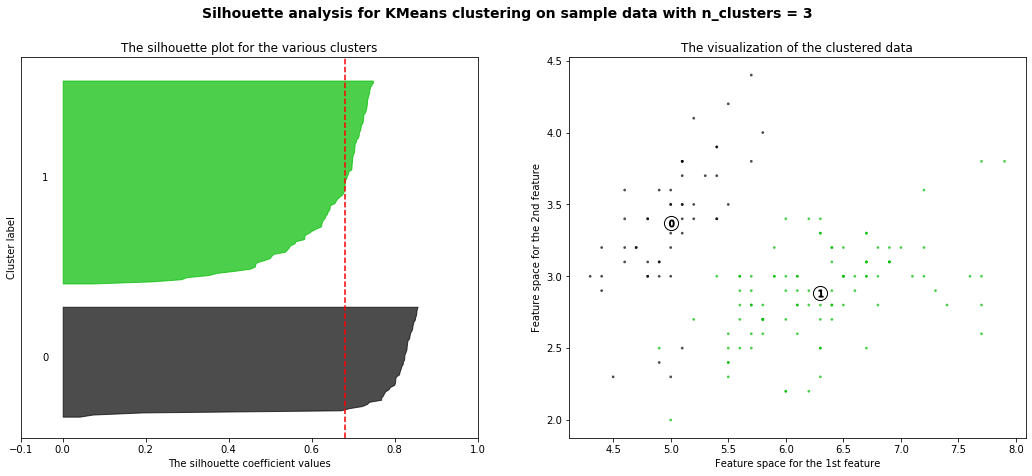

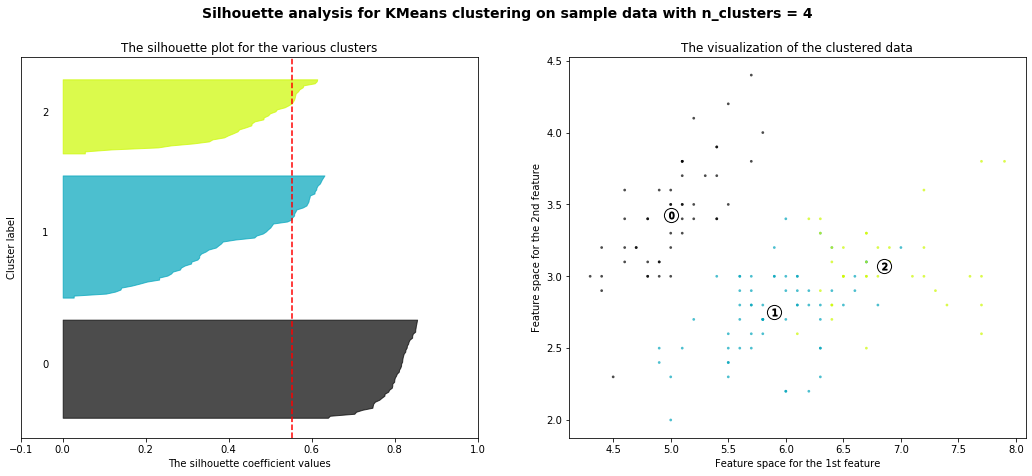

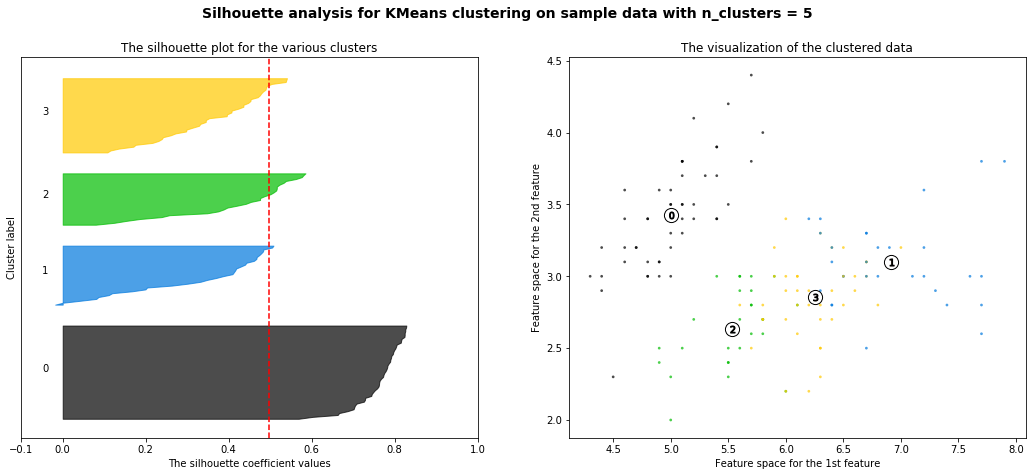

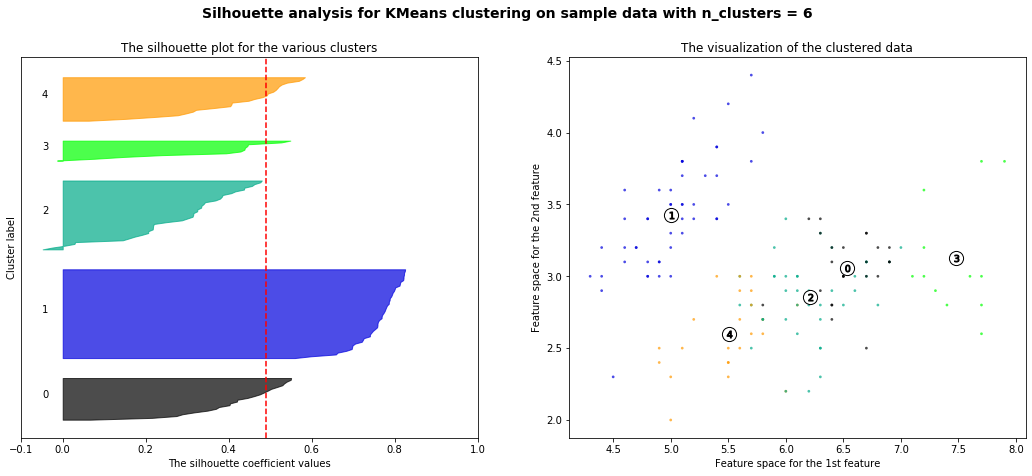

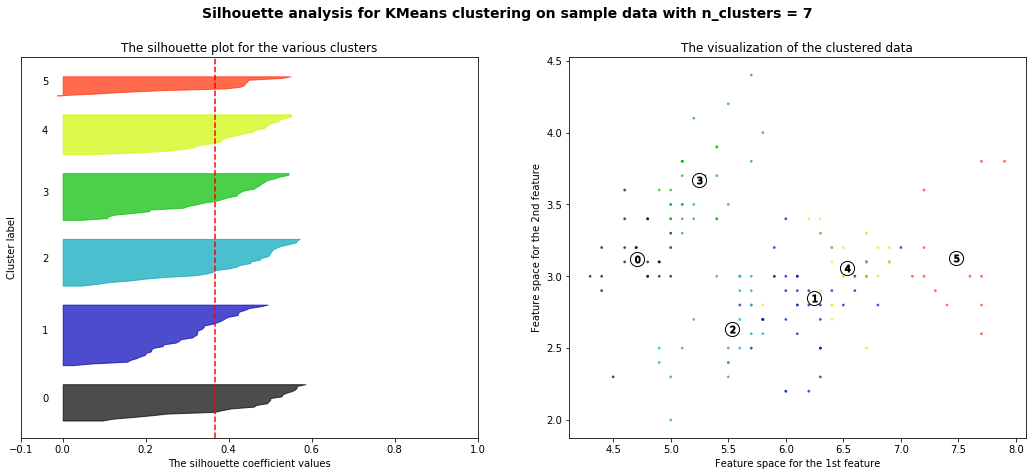

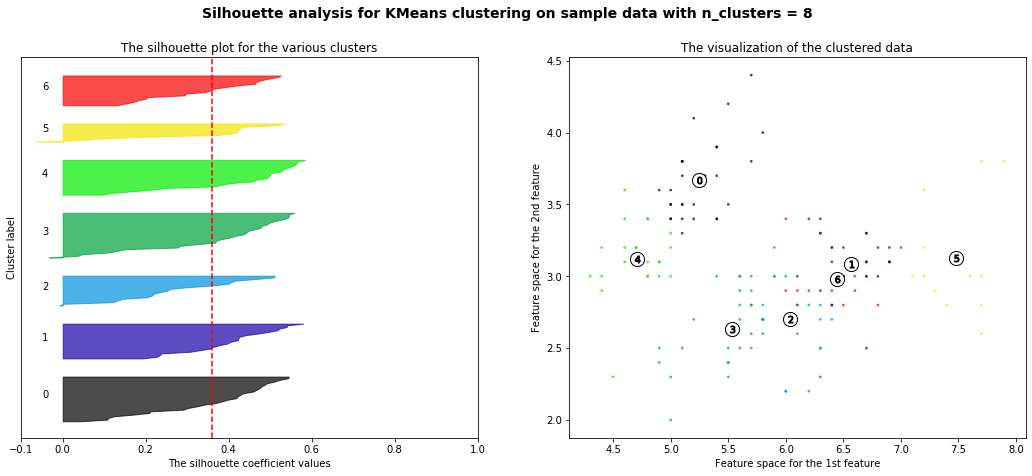

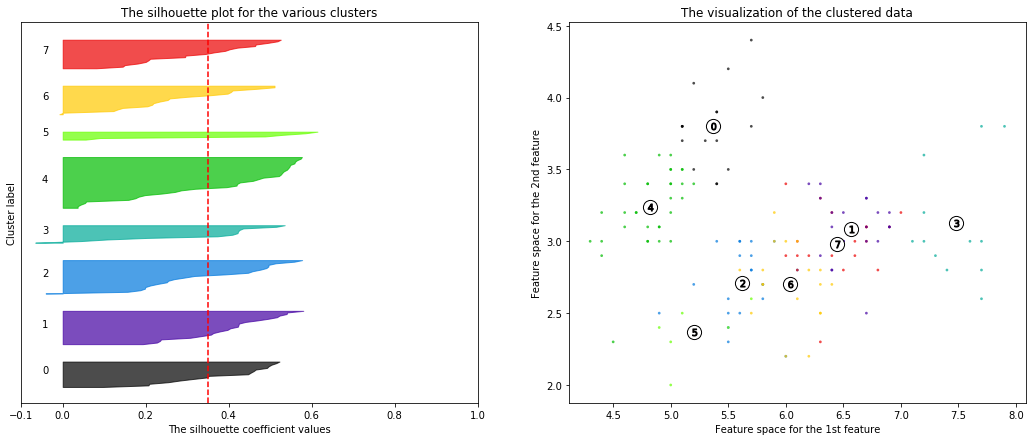

In [6]:
silhouette_analysis_plot(X)

# 分析結果解說 
* 觀察輸出值 : silhouette_score, 如果是一個適合的分群值, 應該要比下一個分群值的分數大很多
* 由結果可以看出 : 2, 3, 5 都是不錯的分群值(因為比 3, 4, 6的分數都高很多), 相形之下, 4, 6, 7 作為分群的效果就不明顯